<a href="https://colab.research.google.com/github/mateo20-bot/Proyectos_/blob/proyecto-VII/PROYECTO_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [16]:
df= pd.read_csv('https://raw.githubusercontent.com/labeconometria/proyectos/main/economicas.csv')

In [17]:
df

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [18]:
df[df.duplicated()]

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION


In [19]:
df.drop_duplicates(inplace= True)

In [20]:
df

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [21]:
df = df.drop(['ESTU_CONSECUTIVO', 'RESULT_NOMBREPRUEBA', 'RESULT_CODIGOPRUEBA', 'ESTU_AGREGADO', 'ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_NACIONALIDAD','ESTU_ESTADOINVESTIGACION', 'ESTU_EXTERIOR','PERIODO','ESTU_ESTUDIANTE',	'ESTU_PAIS_RESIDE',	'ESTU_DEPTO_RESIDE','ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',	'ESTU_COD_RESIDE_MCPIO',	'ESTU_AREARESIDE',	'ESTU_COLE_TERMINO',	'ESTU_CODDANE_COLE_TERMINO',	'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_VALORMATRICULAUNIVERSIDAD',	'ESTU_PAGOMATRICULABECA',	'ESTU_PAGOMATRICULACREDITO',	'ESTU_PAGOMATRICULAPADRES',	'ESTU_PAGOMATRICULAPROPIO', 'ESTU_TIPODOCUMENTOSB11',	'ESTU_SEMESTRECURSA',	'FAMI_EDUCACIONPADRE',	'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',	'FAMI_TRABAJOLABORMADRE',	'FAMI_ESTRATOVIVIENDA',	'ESTU_OTROCOLE_TERMINO' ], axis=1)

In [22]:
df

,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_COMOCAPACITOEXAMENSB11,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,...,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES
0,128,2,M,14/10/1996,Bachiller académico,No realizó ninguna prueba de preparación,Si,Si,Si,No,...,159,3.0,71,57,201,95,99,51.049129,2.0,3
1,209,4,M,17/02/2001,Bachiller académico,Repasó por cuenta propia,Si,Si,Si,Si,...,300,4.0,100,100,222,99,100,66.866795,4.0,4
2,106,1,M,02/10/1991,Bachiller técnico,Repasó por cuenta propia,Si,Si,Si,No,...,0,NaN,1,1,88,1,2,37.751353,1.0,2
3,89,1,F,23/07/1998,Bachiller académico,Repasó por cuenta propia,Si,Si,Si,Si,...,101,1.0,12,7,159,49,71,59.846055,4.0,2
4,122,1,M,23/09/1997,Bachiller académico,Repasó por cuenta propia,Si,Si,Si,Si,...,117,2.0,20,13,156,44,67,48.248516,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,151,2,M,18/03/1996,Bachiller académico,Repasó por cuenta propia,Si,Si,Si,Si,...,180,3.0,93,87,196,93,98,75.589753,4.0,4
3851,162,3,F,26/07/2000,NaN,NaN,Si,Si,Si,Si,...,166,3.0,80,69,192,90,97,75.346915,4.0,4
3852,0,1,F,30/01/1989,NaN,NaN,Si,Si,Si,Si,...,159,3.0,71,57,158,47,70,48.890151,2.0,2
3853,110,1,F,23/04/1998,NaN,NaN,Si,Si,Si,No,...,108,1.0,14,9,117,6,15,43.091355,1.0,2


In [23]:
df.columns

Index(['RESULT_PUNTAJE', 'RESULT_DESEMPENO', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_TITULOOBTENIDOBACHILLER',
       'ESTU_COMOCAPACITOEXAMENSB11', 'FAMI_TIENEINTERNET',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA',
       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_CUANTOSCOMPARTEBAÑO',
       'ESTU_PRESENTACIONCASA', 'ESTU_PAISDOCUMENTOS11',
       'ESTU_HORASSEMANATRABAJA', 'INST_COD_INSTITUCION',
       'INST_NOMBRE_INSTITUCION', 'ESTU_PRGM_ACADEMICO',
       'ESTU_SNIES_PRGMACADEMICO', 'GRUPOREFERENCIA', 'ESTU_PRGM_CODMUNICIPIO',
       'ESTU_PRGM_MUNICIPIO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO',
       'ESTU_INST_CODMUNICIPIO', 'ESTU_INST_MUNICIPIO',
       'ESTU_INST_DEPARTAMENTO', 'INST_CARACTER_ACADEMICO', 'INST_ORIGEN',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION',
 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 3854
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RESULT_PUNTAJE                3855 non-null   int64  
 1   RESULT_DESEMPENO              3855 non-null   int64  
 2   ESTU_GENERO                   3855 non-null   object 
 3   ESTU_FECHANACIMIENTO          3855 non-null   object 
 4   ESTU_TITULOOBTENIDOBACHILLER  3850 non-null   object 
 5   ESTU_COMOCAPACITOEXAMENSB11   3852 non-null   object 
 6   FAMI_TIENEINTERNET            3723 non-null   object 
 7   FAMI_TIENECOMPUTADOR          3483 non-null   object 
 8   FAMI_TIENELAVADORA            3444 non-null   object 
 9   FAMI_TIENEHORNOMICROOGAS      3423 non-null   object 
 10  FAMI_TIENESERVICIOTV          3739 non-null   object 
 11  FAMI_TIENEAUTOMOVIL           3414 non-null   object 
 12  FAMI_TIENEMOTOCICLETA         3423 non-null   object 
 13  FAM

In [25]:
df['PUNT_GLOBAL'].describe()

count    3855.000000
mean      159.772763
std        27.648861
min         0.000000
25%       142.000000
50%       160.000000
75%       178.000000
max       263.000000
Name: PUNT_GLOBAL, dtype: float64

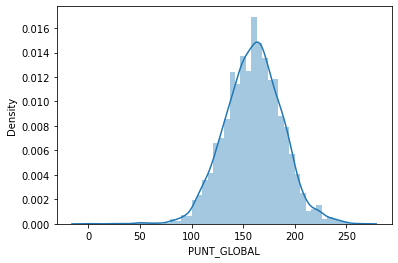

In [27]:
sns.distplot(df['PUNT_GLOBAL']);

In [29]:
print("Skewness: %f" % df['PUNT_GLOBAL'].skew())
print("Kurtosis: %f" % df['PUNT_GLOBAL'].kurt())

Skewness: -0.142511
Kurtosis: 0.788310


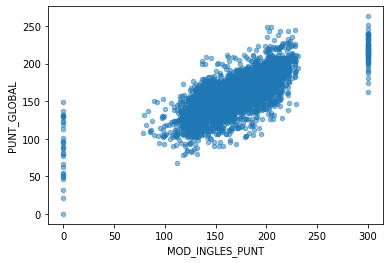

In [33]:
var = 'MOD_INGLES_PUNT'
data = pd.concat([df['PUNT_GLOBAL'], df[var]], axis=1)
data.plot.scatter(x=var, y='PUNT_GLOBAL', alpha = 0.5)

(-0.5, 144.5, 0.0, 300.0)

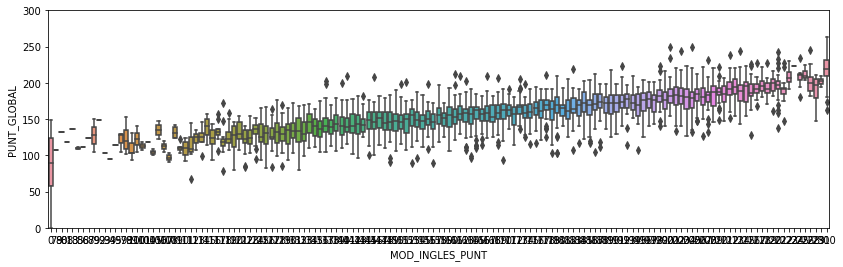

In [41]:
var = 'MOD_INGLES_PUNT'
data = pd.concat([df['PUNT_GLOBAL'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 4))
fig = sns.boxplot(x=var, y="PUNT_GLOBAL", data=data)
fig.axis(ymin=0, ymax=300)

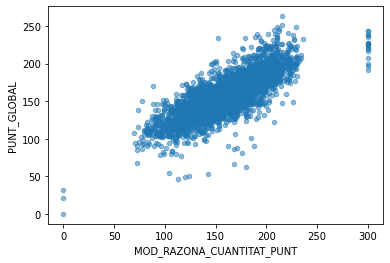

In [42]:
var = 'MOD_RAZONA_CUANTITAT_PUNT'
data = pd.concat([df['PUNT_GLOBAL'], df[var]], axis=1)
data.plot.scatter(x=var, y='PUNT_GLOBAL', alpha = 0.5)

(-0.5, 163.5, 0.0, 300.0)

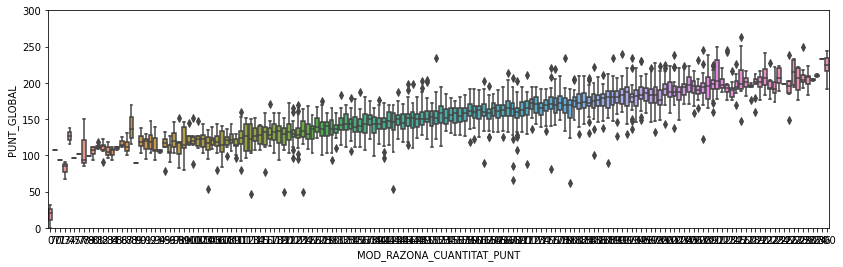

In [43]:
var = 'MOD_RAZONA_CUANTITAT_PUNT'
data = pd.concat([df['PUNT_GLOBAL'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 4))
fig = sns.boxplot(x=var, y="PUNT_GLOBAL", data=data)
fig.axis(ymin=0, ymax=300)

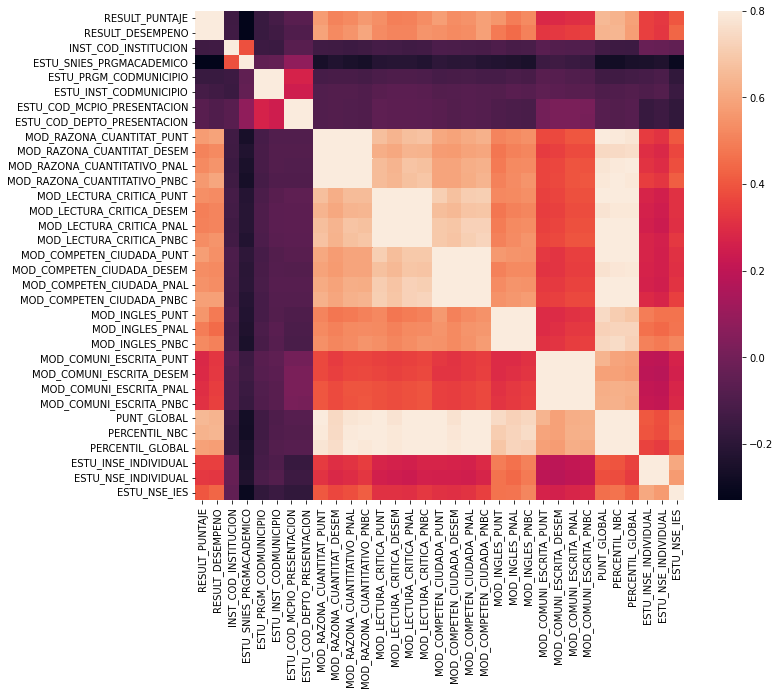

In [44]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [45]:
corr = df.corr()
corr[['PUNT_GLOBAL']].sort_values(by = 'PUNT_GLOBAL',ascending = False).style.background_gradient()

,PUNT_GLOBAL
PUNT_GLOBAL,1.000000
PERCENTIL_NBC,0.964720
PERCENTIL_GLOBAL,0.952726
MOD_LECTURA_CRITICA_PUNT,0.833268
MOD_COMPETEN_CIUDADA_PUNT,0.827727
MOD_COMPETEN_CIUDADA_PNBC,0.820643
MOD_LECTURA_CRITICA_PNBC,0.817473
MOD_LECTURA_CRITICA_PNAL,0.810640
MOD_COMPETEN_CIUDADA_PNAL,0.810121
MOD_RAZONA_CUANTITAT_PUNT,0.803878


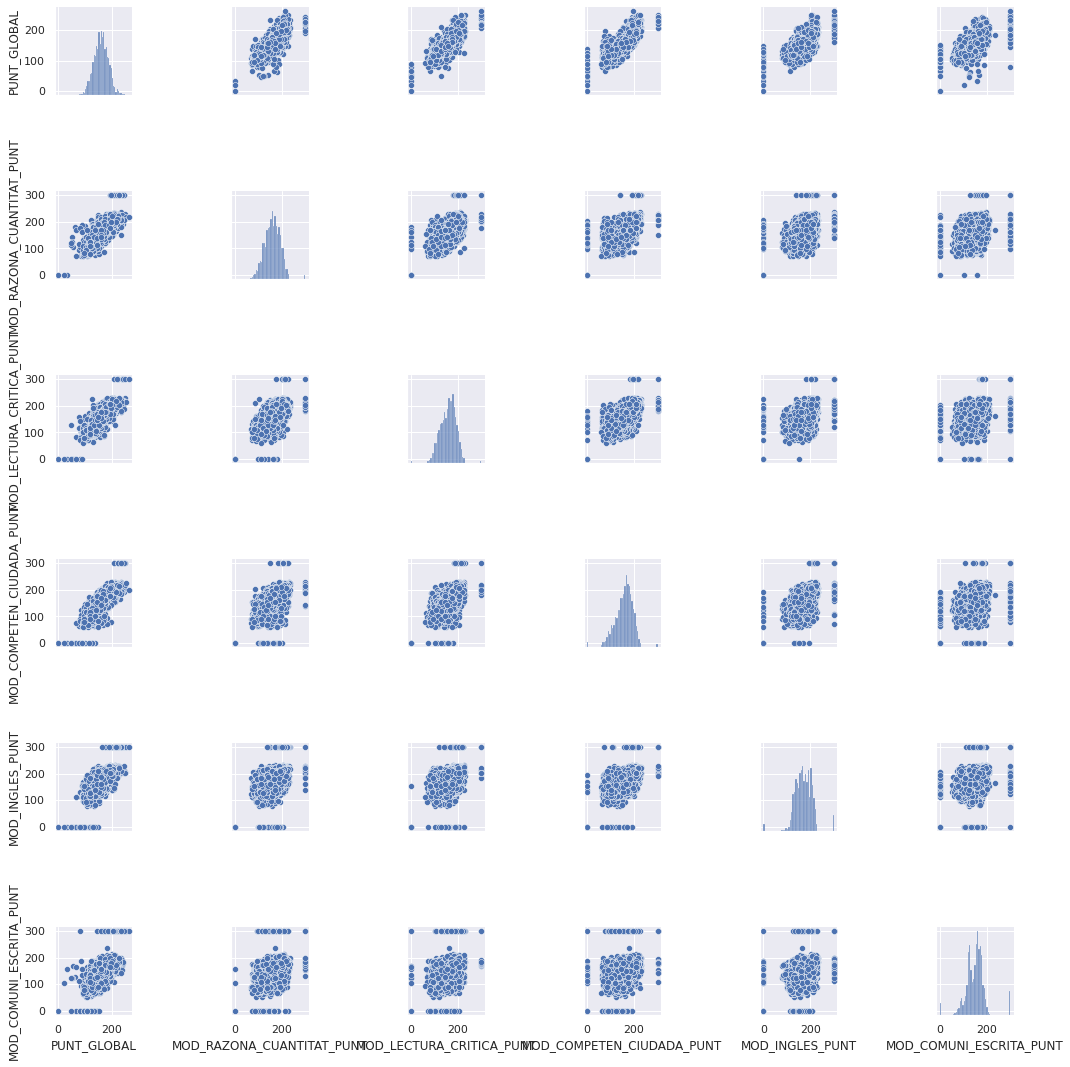

In [46]:
sns.set()
cols = ['PUNT_GLOBAL','MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [47]:
saleprice_scaled = StandardScaler().fit_transform(df['PUNT_GLOBAL'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-5.77938781]
 [-5.01976432]
 [-4.6218663 ]
 [-4.07927809]
 [-4.00693299]
 [-3.97076045]
 [-3.86224281]
 [-3.82607026]
 [-3.53668988]
 [-3.39199969]]

Fuera de la distribución (por arriba):
[[2.93819608]
 [3.01054118]
 [3.04671373]
 [3.04671373]
 [3.08288627]
 [3.11905882]
 [3.22757646]
 [3.22757646]
 [3.29992156]
 [3.73399212]]


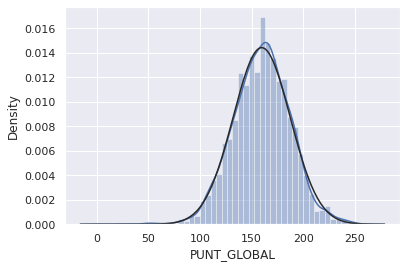

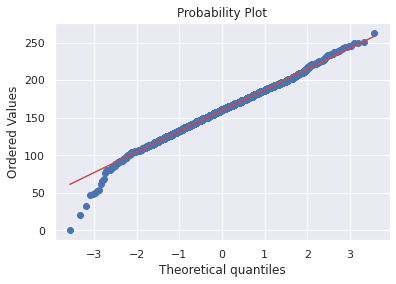

In [48]:
sns.distplot(df['PUNT_GLOBAL'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['PUNT_GLOBAL'], plot = plt)

Conclusiones

Las personas con conocimiento y dominio en ingles y matematicas son más probables a tener un mejor resultado ICFES